# **Computational Methods**
## **Numerical differentiation & Interpolation**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.rcParams['figure.figsize'] = [15, 6.67]

Suppose we have scattered data, like in the following example:

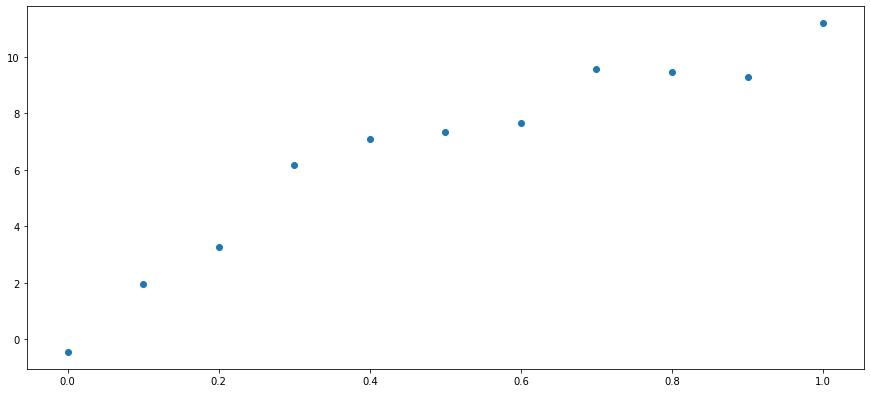

In [10]:
x = np.arange(0, 1.1, 0.1)
y = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.3, 11.2])

plt.scatter(x, y)
plt.show()

One way to estimate the derivative is fitting a low-order polynomial and simply use the derivative of this polynomial

In [11]:
p = np.polyfit(x, y, 2)

Let's plot the fitted polynomial to see how good it fits the data (or not...)

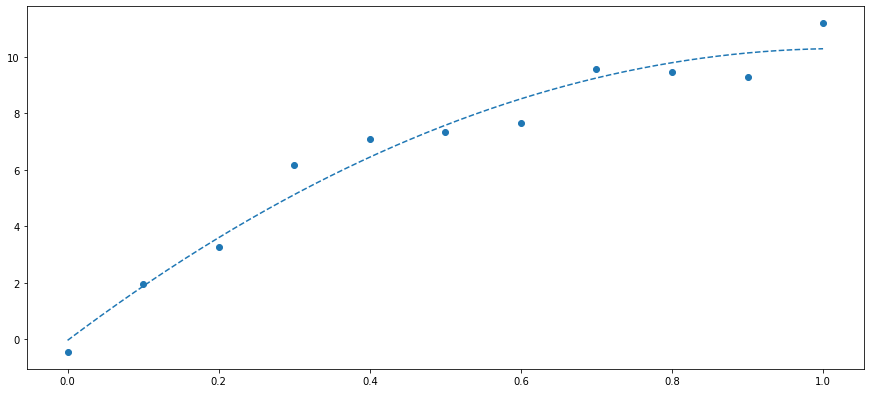

In [12]:
xi = np.linspace(0, 1, 1000)
yi = np.polyval(p, xi)
plt.scatter(x, y)
plt.plot(xi,yi,'--')
plt.show()

We already learned about the function `polyder()` which calculated the polynomial which is the
derivative of the input polynomial

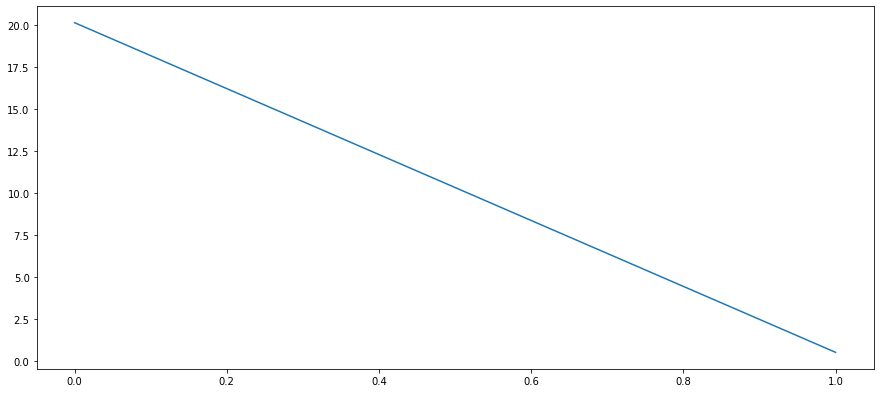

In [18]:
dp = np.polyder(p)
dyp = np.polyval(dp, xi)
plt.plot(xi, dyp)
plt.show()

Python provides the function 'diff' which allows a crude, first-order estimate of the derivative, by simply calculating the differences.   
Dividing the y diferrences (*delta y*) by the x differences (*delta x*), is a first approximation of the derivative.  
It's only an approximation because we don't let delta x go to the zero limit, but simply use the value given to us.

In [19]:
dy = np.diff(y) / np.diff(x)

Let's plot this new derivative on the same graph.  
First we have to calculate the middle x between very two consecutive x's.

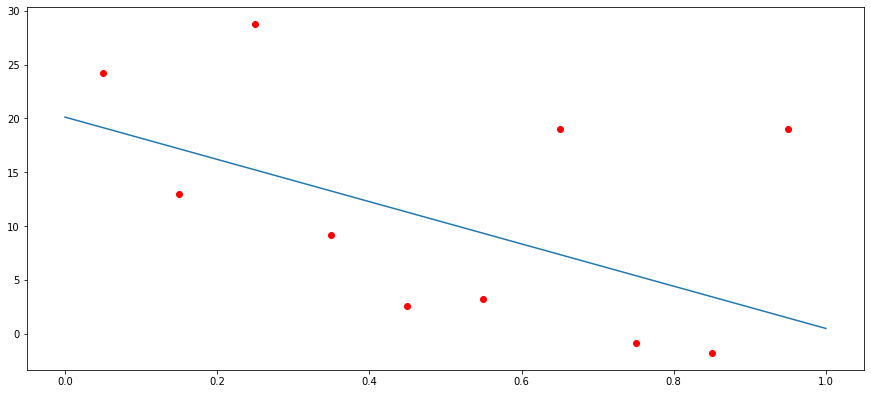

In [26]:
xmean = (x[1 : ] + x[ :-1]) / 2
plt.plot(xmean, dy, 'or')
plt.plot(xi, dyp)
plt.show()

The plot demonstrates the fact that the differentiation operator **amplifies noise.**  
That's why the derivative estimated from the differences is very noisy and erratic,  
while that estimated from the polynomial fit is smooth, and in general more **well behaved.** 

For two-dimensional functions Python provides two more differential operators.  

Let's use the 'peaks' function as an example again.

In [28]:
def peaks(n):
    """
    A function for 3D ploting exersice.
    Args:
        n (int): The output's resolution
        
    Returns:
        ndarray: The x coordinates of shape (n, n)
        ndarray: The y coordinates of shape (n, n)
        ndarray: The z values of the function of shape (n, n)
    """
    x = np.linspace(-3, 3, n)
    y = np.linspace(-3, 3, n)
    X, Y = np.meshgrid(x, y)
    Z = 3 * (1 - X)**2 * np.exp(-(X**2) - (Y+1)**2) \
        - 10 * (X/5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
        - 1/3 * np.exp(-(X + 1)**2 - Y**2)
    return X, Y, Z

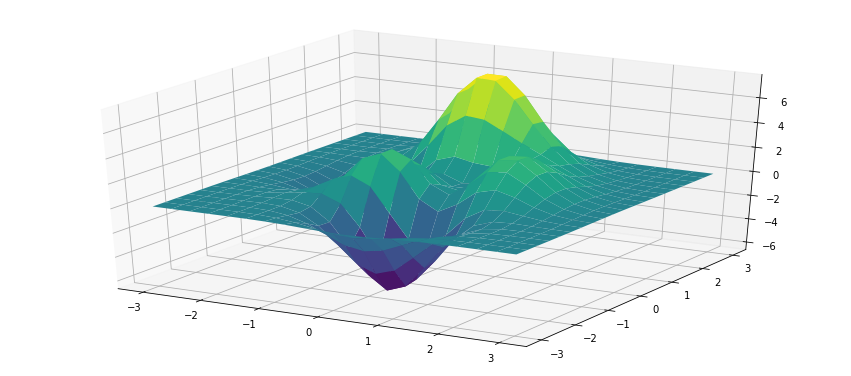

In [87]:
X, Y, Z = peaks(20)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
plt.show()

One function is the `np.gradient()` function which calculates the two components of the gradient of the two dimensional matrix defined by z.  
Again, one has to remember this is a very crude approximation of the gradient, but it improves if we have a finer resolution.

In [173]:
gx, gy = np.gradient(Z)

`np.gradient` assumes that the **differences in x and y are constant.**  
We can supply the function 'gradient' with their values.

In [70]:
hx = X[0, 1] - X[0, 0]
hy = Y[1, 0] - Y[0, 0]
gx, gy = np.gradient(Z, hx, hy)

In order to visualize it we use the function `plt.quiver()` which draws arrows at each point.

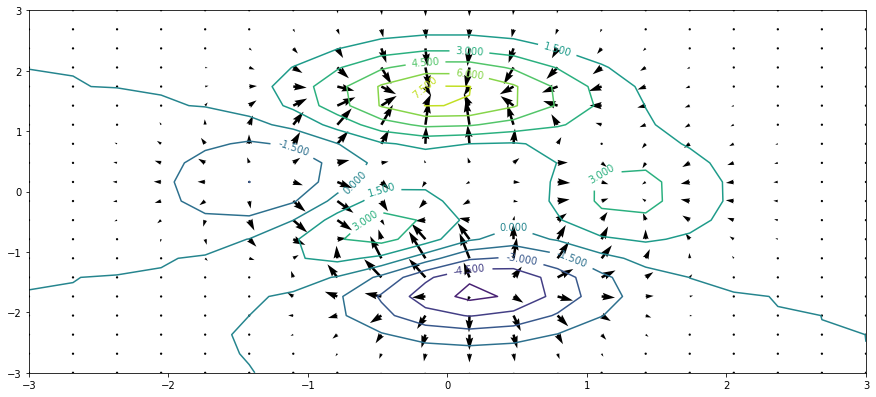

In [100]:
ax = plt.axes()
CS = ax.contour(X, Y, Z, 10)
ax.clabel(CS, inline=1, fontsize=10)

q = plt.quiver(X, Y, gy, gx, scale=100)
plt.show()

Another function is `scipy.sparse.csgraph.laplacian()` which calculates the Laplacian.

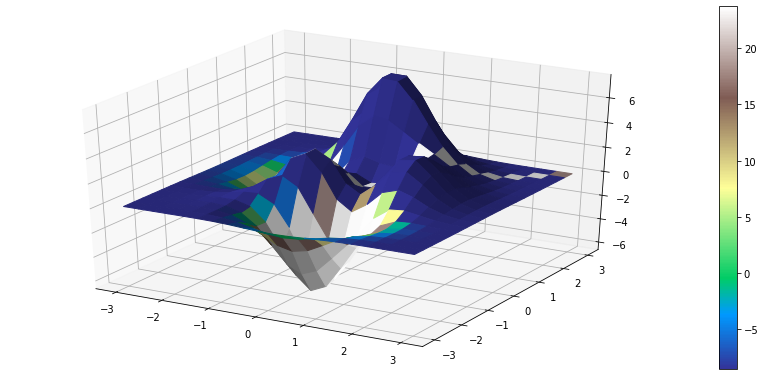

In [131]:
from scipy.sparse.csgraph import laplacian
lap = laplacian(Z);

ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, facecolors=plt.cm.terrain(lap))

m = plt.cm.ScalarMappable(cmap=plt.cm.terrain)
m.set_array(lap)
plt.colorbar(m)

plt.show()

In the above demonstration we use the absolute
value of the Laplacian to colour the surface.

---
## Numerical integration in Python


Let's estimate the definite integral  of the function 'humps', between -1 and 2.

The most crude approximation uses the trapezoid rule.  
We supply the function with the values of the function at some points  
and it uses those points to calculate the trapezoidal summation.  
An explanation is given in the Wikipedia page: [https://en.wikipedia.org/wiki/Trapezoidal_rule]


In [134]:
def humps(x):
    return 1 / ((x - 0.3)**2 + .01) + 1 / ((x - .9)**2 + .04) - 6

Let's first use a division of the segment [-1, 2] to intervals of length 0.17.

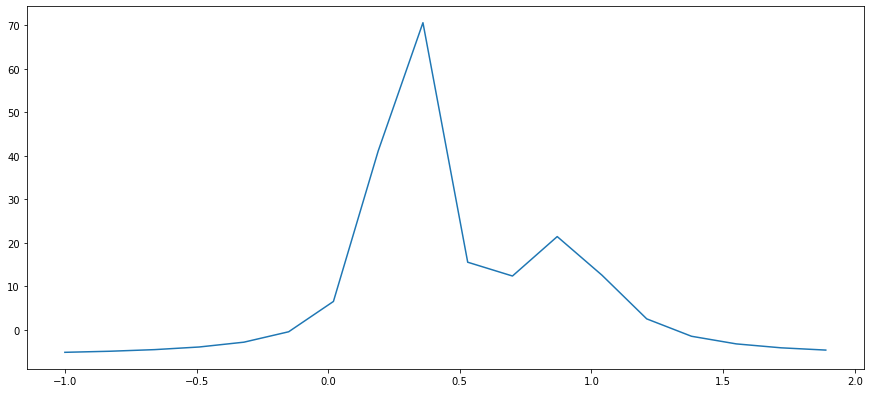

In [145]:
x = np.arange(-1, 2, 0.17)
y = humps(x)
plt.plot(x, y)

Now we'll use the trapezoid approximation to calculate the integral based on this division

In [146]:
area = np.trapz(y, x)
area

25.91740000817553

If we use a finer division, to 100 equal intervals, we get a better approximation.

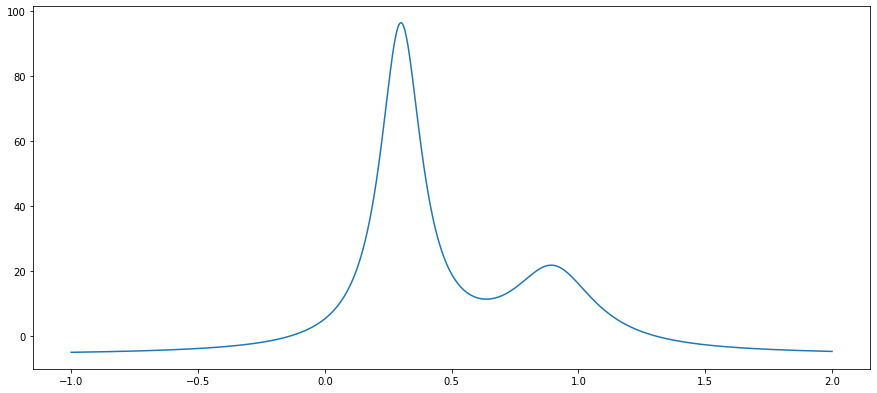

26.344958219003495

In [147]:
x = np.linspace(-1, 2, 1000)
y = humps(x);
plt.plot(x,y)
plt.show()
np.trapz(y, x)

The function `scipy.integrate.cumtrapz`, uses the same idea to calculate a *cumulative trapezoidal summation,*  
which is actually an approximation to the indefinite integral (the operation which is the opposite to differentiation).

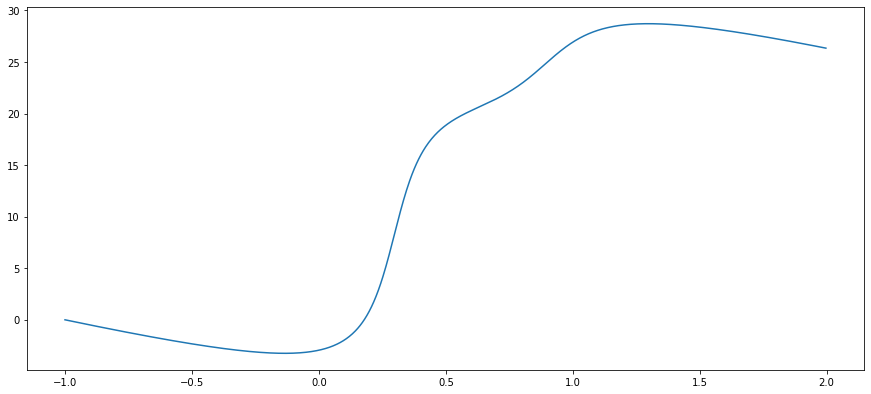

In [149]:
from scipy import integrate

F = integrate.cumtrapz(y, x)
plt.plot(x[0: -1], F)

In the above calculation we determined the division of the interval. However, if we have a function handle to calculate the integrand,  
we can let Python decide on the optimal division itself.


`scipy.integrate` is a sub-package that provides  integration techniques.  
For example the function `quad` uses the *recursive adaptive Simpson quadrature algorithm.*  
[scipy.itegrate documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

In [154]:
x1, x2 = -1, 2
I = integrate.quad(humps, x1, x2)
print(f"The calculated area between {x1}, {x2} is {I[0]}\nwith estimated absalute error {I[1]}")

The calculated area between -1, 2 is 26.34496047137833
with estimated absalute error 2.5604284317748416e-09


We can supply quad with a tolerance on the value which says how much we want to value to be accurate.  
For example, to have an accuracy of two decimal points:

In [163]:
I = integrate.quad(humps, x1, x2, epsabs=1e-2)
I

(26.344960459601293, 0.004959975603528059)

`dblquad` is used for calculating double integrals of two-dimensional functions.

Let's demonstrate on the function _sin(x) * sin(y) + 1_

In [167]:
def my_func(xx, yy):
    return np.sin(xx) * np.sin(yy) + 1

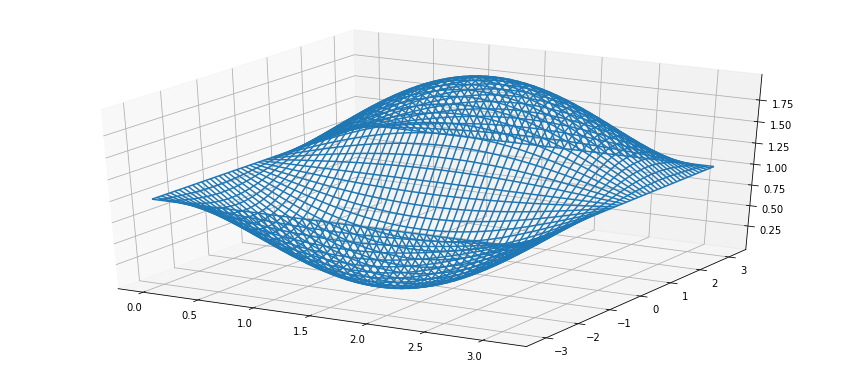

In [169]:
x = np.linspace(0, np.pi, 1000)
y = np.linspace(-np.pi, np.pi, 1000)
xx, yy = np.meshgrid(x, y)
zz = my_func(xx, yy)

ax = plt.axes(projection='3d')
ax.plot_wireframe(xx, yy, zz)
plt.show()

Calculate the integral

In [172]:
volume = integrate.dblquad(my_func, 0, np.pi, -np.pi, np.pi)
volume

(19.739208802178716, 2.1914924100062368e-13)

Analytically it's very easy to show that the integral is supposed to be _2 * pi^2_

There is also a function to calculate triple integrals with `tplquad`